# A Dive into Pokemon's In-game Stats

A Project by Elliot Kerr

In this project I will be answering the quesiton: How have the in-game stats of Pokemon changed throughout the makings of new Pokemon games.

The datasets I have obtained are from Kaggle, however there were some issues in the datasets so I corrected them and added more through Excel by using filters to add more information.

I will also be creating a Tableau Dashboard as a short form alternative to this python document and a video presentation. Video Link: https://www.youtube.com/watch?v=e63Ex23eU68. Tableau Link: https://public.tableau.com/app/profile/elliot.kerr2826/viz/PokemonPortfolioProject/PokemonStatsDashboardA4

Load all libraries I will need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Load our main dataset. It contains all stats, types, forms and names. Most columns are self explainitory but total is the Base Stat Total (BST) which adds up all individual stats.

In [2]:
stats = pd.read_csv("pokemon_stats.csv", index_col = None)

In [3]:
stats.information.unique()

array([nan, 'Mega/Primal', 'Regional Variant', 'Inaccessible Ingame'],
      dtype=object)

In [82]:
stats.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
0,1,Bulbasaur,Bulbasaur,default,318,45,49,49,65,65,45,grass,poison,#3D7DCA,NaN
1,2,Ivysaur,Ivysaur,default,405,60,62,63,80,80,60,grass,poison,#3D7DCA,NaN
2,3,Mega Venusaur,Venusaur,Mega,625,80,100,123,122,120,80,grass,poison,green,Mega/Primal
3,3,Venusaur,Venusaur,default,525,80,82,83,100,100,80,grass,poison,#3D7DCA,NaN
4,4,Charmander,Charmander,default,309,39,52,43,60,50,65,fire,NaN,#3D7DCA,NaN


Since we seem to have a few different options in information, one of which is mega/primal, it may be best to have a look at the first 20 pokemon in a sorted stats dataset.

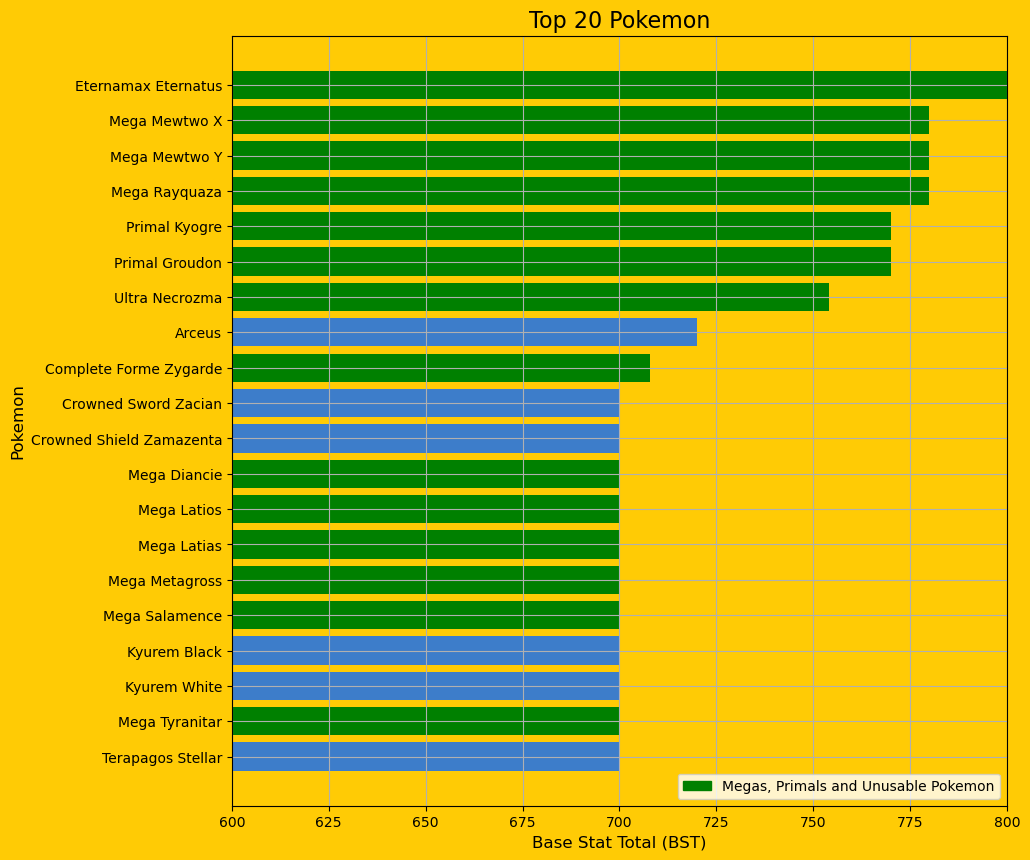

In [81]:
plt.figure(figsize = (10,10), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = stats.sort_values(by = "total", ascending = False).name.head(20),
         width = stats.sort_values(by = "total", ascending = False).total.head(20),
         color = stats.sort_values(by = "total", ascending = False).colour.head(20))
plt.yticks(fontsize = 10)
ax.set(xlim = (600, 800))
plt.grid()
plt.title("Top 20 Pokemon", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
meg_prim = mpatches.Patch(color='green', label='Megas, Primals and Unusable Pokemon')
ax.legend(handles=[meg_prim], loc = 4)
plt.savefig("0. Top 20 Pokemon.png", bbox_inches='tight')
plt.show()

In the top 20, we have 6 pokemon that are not in green. The other 14 pokemon are either mega evolutions, primal reversions or pokemon that are only found in a story event and cannot be use in a battle. These pokemon will skew certain plots or values in the dataset so we want to remove these. We will return to these in a later part of the analysis.

Create a function that will read a csv file, take the first and last index for the generation and returns the stats dataset for the generation required.

In [5]:
def generation_provider(gen):
    if type(gen) == int:
        gen_df = pd.read_csv("pokemon_data_gen{}.csv".format(gen), index_col = None).sort_values(by = "index")
        min_dex_no = gen_df["index"].min()
        if gen == 9:
            max_dex_no = stats["index"].max()
        else:
            max_dex_no = gen_df["index"].max()
        min_dex = stats["index"] >= min_dex_no
        max_dex = stats["index"] <= max_dex_no
        stats_gen_df = stats[min_dex & max_dex]
        stats_gen_df = stats_gen_df[['index', 'name', 'species', 'form', 'total', 'hp', 'attack', 'defense',
                                    'sp_atk', 'sp_def', 'speed', 'type1', 'type2', "colour", "information"]]
        no_meg_prim = stats_gen_df["information"] != "Mega/Primal"
        no_inacc = stats_gen_df["information"] != "Inaccessible Ingame"
        
        stats_gen_df = stats_gen_df[no_meg_prim & no_inacc]
        
        return stats_gen_df
    else:
        print("The input needs to be an integer between 1 and 9")

It may be best to gain a broad idea of how the data is distributed so we can plot a histogram to analyse this.

## Histogram

We need to find the mean and median for the entire dataset that excludes the aforementioned pokemon. We do this by creating a temporary dataset that removes these pokemon without affecting the original dataset.

In [6]:
no_meg_prim = stats["information"] != "Mega/Primal"
no_inacc = stats["information"] != "Inaccessible Ingame"

stats_temp = stats[no_meg_prim & no_inacc]

overall_mean = np.mean(stats_temp.total)
overall_median = np.median(stats_temp.total)
print("Overall Mean: {}, Overall Median: {}".format(overall_mean, overall_median))

Overall Mean: 433.96379310344827, Overall Median: 456.5


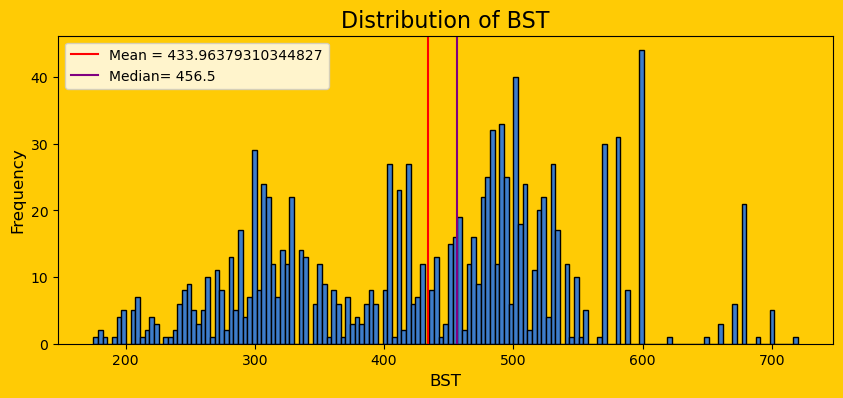

In [7]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.hist(x = stats_temp.total, bins = 151, edgecolor='black', color = "#3D7DCA")
plt.axvline(x = stats_temp["total"].mean(), color = "red", label = "Mean = {}".format(stats_temp["total"].mean()))
plt.axvline(x = stats_temp["total"].median(), color = "purple", label = "Median= {}".format(stats_temp["total"].median()))
plt.legend()
ax.set_facecolor("#FFCB05")
plt.title("Distribution of BST", fontsize = 16)
plt.xlabel("BST", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.savefig("0. Distribution of BST histogram.png", bbox_inches='tight')
plt.show()

We have a couple of trends in this plot. Firstly, if we look between 200 and 400, it looks like a small normal distribution. A similar thing happens around 500 too. Overall, it seems to be multimodal with the largest being at 600. There are approximately 45 pokemon that share this BST and very few are above this.

There is also a mode at between 400 and 450. This is likely caused by the mid stage evolutions which will have a base stat here to then evolve into a pokemon with at least 500 BST; as seen by the mode around 500.

Since we have the largest mode at 600 BST, it may be best to look view how many pokemon reside around this value. We can do this by generation and using boolean masks to create new datasets that we can use to count these pokemon.

## Generation 1

Let's obtain our generation 1 stat dataset.

In [8]:
stats_gen1 = generation_provider(1)

In [9]:
stats_gen1.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
0,1,Bulbasaur,Bulbasaur,default,318,45,49,49,65,65,45,grass,poison,#3D7DCA,NaN
1,2,Ivysaur,Ivysaur,default,405,60,62,63,80,80,60,grass,poison,#3D7DCA,NaN
3,3,Venusaur,Venusaur,default,525,80,82,83,100,100,80,grass,poison,#3D7DCA,NaN
4,4,Charmander,Charmander,default,309,39,52,43,60,50,65,fire,NaN,#3D7DCA,NaN
5,5,Charmeleon,Charmeleon,default,405,58,64,58,80,65,80,fire,NaN,#3D7DCA,NaN


Let's first calculate the summary statistics for the base stat total

In [10]:
gen1_count = np.max(stats_gen1["index"]) + 1 - np.min(stats_gen1["index"])
gen1_mean = np.mean(stats_gen1.total) 
gen1_median = np.median(stats_gen1.total) 
gen1_min = np.min(stats_gen1.total) 
gen1_max = np.max(stats_gen1.total) 
print("GEN 1: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen1_count, gen1_mean, gen1_median, gen1_min, gen1_max))

GEN 1: 151 Pokemon    Mean: 411.5132275132275, Median: 425.0, Min: 195, Max: 680


Let's also count how many pokemon have a BST of at least 600 and over 600, which are two seperate values for most generations

In [11]:
at_least_600_gen1 = stats_gen1[stats_gen1["total"] >= 600]
over_600_gen1 = stats_gen1[stats_gen1["total"] > 600]
at_least_600_gen1_count = len(at_least_600_gen1)
over_600_gen1_count = len(over_600_gen1)

print("GEN 1:  At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen1_count), str(over_600_gen1_count)))

GEN 1:  At least 600 BST: 3, Over 600 BST: 1


And now let's plot the pokemon over 600 BST

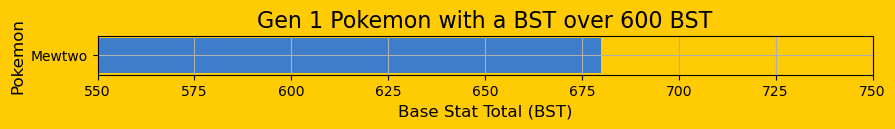

In [12]:
plt.figure(figsize = (10,0.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen1.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen1.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen1.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen1.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
ax.set(xlim = (550, 750))
plt.grid()
plt.title("Gen 1 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 1 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

So only Mewtwo has a BST over 600! 

## Generation 2

Next, let's obtain our generation 2 stat dataset.

In [13]:
stats_gen2 = generation_provider(2)

In [14]:
stats_gen2.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
204,152,Chikorita,Chikorita,default,318,45,49,65,49,65,45,grass,NaN,#3D7DCA,NaN
205,153,Bayleef,Bayleef,default,405,60,62,80,63,80,60,grass,NaN,#3D7DCA,NaN
206,154,Meganium,Meganium,default,525,80,82,100,83,100,80,grass,NaN,#3D7DCA,NaN
207,155,Cyndaquil,Cyndaquil,default,309,39,52,43,60,50,65,fire,NaN,#3D7DCA,NaN
208,156,Quilava,Quilava,default,405,58,64,58,80,65,80,fire,NaN,#3D7DCA,NaN


Same as last time, time to calculate the summary statistics

In [15]:
gen2_count = np.max(stats_gen2["index"]) + 1 - np.min(stats_gen2["index"])
gen2_mean = np.mean(stats_gen2.total) 
gen2_median = np.median(stats_gen2.total) 
gen2_min = np.min(stats_gen2.total) 
gen2_max = np.max(stats_gen2.total) 
print("GEN 2: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen2_count, gen2_mean, gen2_median, gen2_min, gen2_max))

GEN 2: 100 Pokemon    Mean: 407.8490566037736, Median: 417.5, Min: 180, Max: 680


Let's find the pokemon that have at least 600 BST

In [16]:
at_least_600_gen2 = stats_gen2[stats_gen2["total"] >= 600]
over_600_gen2 = stats_gen2[stats_gen2["total"] > 600]
at_least_600_gen2_count = len(at_least_600_gen2)
over_600_gen2_count = len(over_600_gen2)

print("GEN 2:  At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen2_count), str(over_600_gen2_count)))

GEN 2:  At least 600 BST: 4, Over 600 BST: 2


Time to plot

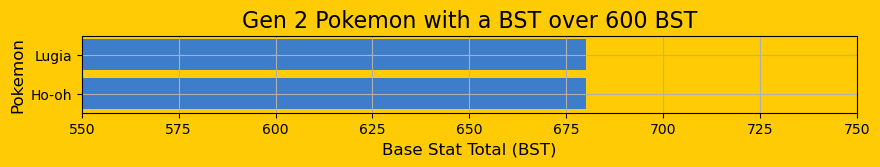

In [17]:
plt.figure(figsize = (10,1), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen2.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen2.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen2.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen2.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Gen 2 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 2 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

So just the two box are legendaries have over 600 BST!

We now repeat this for all 9 generations

## Generation 3

In [18]:
stats_gen3 = generation_provider(3)

In [19]:
stats_gen3.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
316,252,Treecko,Treecko,default,310,40,45,35,65,55,70,grass,NaN,#3D7DCA,NaN
317,253,Grovyle,Grovyle,default,405,50,65,45,85,65,95,grass,NaN,#3D7DCA,NaN
319,254,Sceptile,Sceptile,default,530,70,85,65,105,85,120,grass,NaN,#3D7DCA,NaN
320,255,Torchic,Torchic,default,310,45,60,40,70,50,45,fire,NaN,#3D7DCA,NaN
321,256,Combusken,Combusken,default,405,60,85,60,85,60,55,fire,fighting,#3D7DCA,NaN


In [20]:
gen3_count = np.max(stats_gen3["index"]) + 1 - np.min(stats_gen3["index"])
gen3_mean = np.mean(stats_gen3.total) 
gen3_median = np.median(stats_gen3.total) 
gen3_min = np.min(stats_gen3.total) 
gen3_max = np.max(stats_gen3.total) 
print("GEN 3: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen3_count, gen3_mean, gen3_median,
                                                                           gen3_min, gen3_max))

at_least_600_gen3 = stats_gen3[stats_gen3["total"] >= 600]
over_600_gen3 = stats_gen3[stats_gen3["total"] > 600]
at_least_600_gen3_count = len(at_least_600_gen3)
over_600_gen3_count = len(over_600_gen3)

print("GEN 3: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen3_count), str(over_600_gen3_count)))


GEN 3: 135 Pokemon    Mean: 407.15384615384613, Median: 420.0, Min: 190, Max: 680
GEN 3: At least 600 BST: 13, Over 600 BST: 4


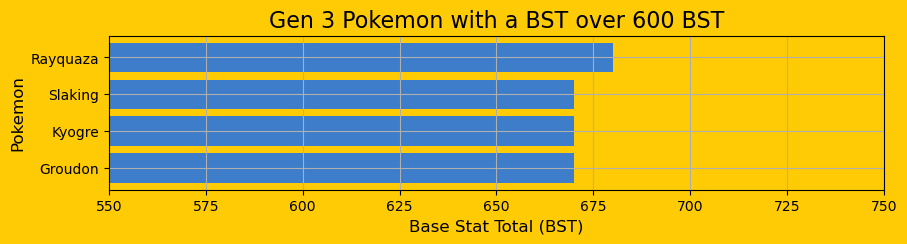

In [21]:
plt.figure(figsize = (10,2), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen3.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen3.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen3.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen3.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
ax.set(xlim = (550, 750))
plt.grid()
plt.title("Gen 3 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 3 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 4

In [22]:
stats_gen4 = generation_provider(4)

In [23]:
stats_gen4.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
481,387,Turtwig,Turtwig,default,318,55,68,64,45,55,31,grass,NaN,#3D7DCA,NaN
482,388,Grotle,Grotle,default,405,75,89,85,55,65,36,grass,NaN,#3D7DCA,NaN
483,389,Torterra,Torterra,default,525,95,109,105,75,85,56,grass,ground,#3D7DCA,NaN
484,390,Chimchar,Chimchar,default,309,44,58,44,58,44,61,fire,NaN,#3D7DCA,NaN
485,391,Monferno,Monferno,default,405,64,78,52,78,52,81,fire,fighting,#3D7DCA,NaN


In [24]:
gen4_count = np.max(stats_gen4["index"]) + 1 - np.min(stats_gen4["index"])
gen4_mean = np.mean(stats_gen4.total) 
gen4_median = np.median(stats_gen4.total) 
gen4_min = np.min(stats_gen4.total) 
gen4_max = np.max(stats_gen4.total) 
print("GEN 4: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen4_count, gen4_mean, gen4_median,
                                                                           gen4_min, gen4_max))

at_least_600_gen4 = stats_gen4[stats_gen4["total"] >= 600]
over_600_gen4 = stats_gen4[stats_gen4["total"] > 600]
at_least_600_gen4_count = len(at_least_600_gen4)
over_600_gen4_count = len(over_600_gen4)

print("GEN 4: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen4_count), str(over_600_gen4_count)))


GEN 4: 107 Pokemon    Mean: 451.76666666666665, Median: 481.0, Min: 194, Max: 720
GEN 4: At least 600 BST: 14, Over 600 BST: 8


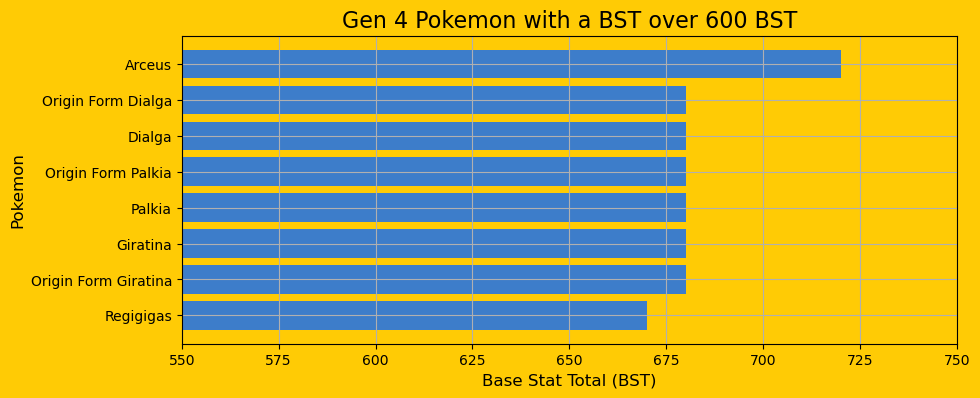

In [25]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen4.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen4.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen4.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen4.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
ax.set(xlim = (550, 750))
plt.grid()
plt.title("Gen 4 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 4 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 5

In [26]:
stats_gen5 = generation_provider(5)

In [27]:
stats_gen5.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
606,494,Victini,Victini,default,600,100,100,100,100,100,100,psychic,fire,#3D7DCA,NaN
607,495,Snivy,Snivy,default,308,45,45,55,45,55,63,grass,NaN,#3D7DCA,NaN
608,496,Servine,Servine,default,413,60,60,75,60,75,83,grass,NaN,#3D7DCA,NaN
609,497,Serperior,Serperior,default,528,75,75,95,75,95,113,grass,NaN,#3D7DCA,NaN
610,498,Tepig,Tepig,default,308,65,63,45,45,45,45,fire,NaN,#3D7DCA,NaN


In [28]:
gen5_count = np.max(stats_gen5["index"]) + 1 - np.min(stats_gen5["index"])
gen5_mean = np.mean(stats_gen5.total) 
gen5_median = np.median(stats_gen5.total) 
gen5_min = np.min(stats_gen5.total) 
gen5_max = np.max(stats_gen5.total) 
print("GEN 5: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen5_count, gen5_mean, gen5_median,
                                                                           gen5_min, gen5_max))

at_least_600_gen5 = stats_gen5[stats_gen5["total"] >= 600]
over_600_gen5 = stats_gen5[stats_gen5["total"] > 600]
at_least_600_gen5_count = len(at_least_600_gen5)
over_600_gen5_count = len(over_600_gen5)

print("GEN 5: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen5_count), str(over_600_gen5_count)))


GEN 5: 156 Pokemon    Mean: 435.71022727272725, Median: 465.0, Min: 255, Max: 700
GEN 5: At least 600 BST: 12, Over 600 BST: 5


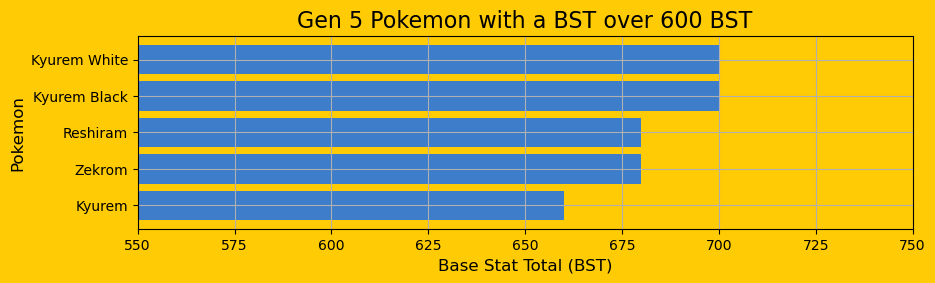

In [29]:
plt.figure(figsize = (10,2.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen5.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen5.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen5.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen5.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Gen 5 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 5 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 6

In [30]:
stats_gen6 = generation_provider(6)

In [31]:
stats_gen6.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
783,650,Chespin,Chespin,default,313,56,61,65,48,45,38,grass,NaN,#3D7DCA,NaN
784,651,Quilladin,Quilladin,default,405,61,78,95,56,58,57,grass,NaN,#3D7DCA,NaN
785,652,Chesnaught,Chesnaught,default,530,88,107,122,74,75,64,grass,fighting,#3D7DCA,NaN
786,653,Fennekin,Fennekin,default,307,40,45,40,62,60,60,fire,NaN,#3D7DCA,NaN
787,654,Braixen,Braixen,default,409,59,59,58,90,70,73,fire,NaN,#3D7DCA,NaN


In [32]:
gen6_count = np.max(stats_gen6["index"]) + 1 - np.min(stats_gen6["index"])
gen6_mean = np.mean(stats_gen6.total) 
gen6_median = np.median(stats_gen6.total) 
gen6_min = np.min(stats_gen6.total) 
gen6_max = np.max(stats_gen6.total) 
print("GEN 6: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen6_count, gen6_mean, gen6_median,
                                                                           gen6_min, gen6_max))

at_least_600_gen6 = stats_gen6[stats_gen6["total"] >= 600]
over_600_gen6 = stats_gen6[stats_gen6["total"] > 600]
at_least_600_gen6_count = len(at_least_600_gen6)
over_600_gen6_count = len(over_600_gen6)

print("GEN 6: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen6_count), str(over_600_gen6_count)))


GEN 6: 72 Pokemon    Mean: 436.4117647058824, Median: 466.0, Min: 200, Max: 680
GEN 6: At least 600 BST: 9, Over 600 BST: 3


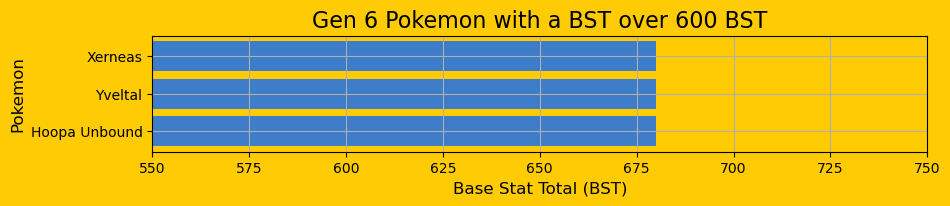

In [33]:
plt.figure(figsize = (10,1.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen6.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen6.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen6.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen6.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
ax.set(xlim = (550, 750))
plt.grid()
plt.title("Gen 6 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 6 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 7

In [34]:
stats_gen7 = generation_provider(7)

In [35]:
stats_gen7.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
871,722,Rowlet,Rowlet,default,320,68,55,55,50,50,42,grass,flying,#3D7DCA,NaN
872,723,Dartrix,Dartrix,default,420,78,75,75,70,70,52,grass,flying,#3D7DCA,NaN
873,724,Hisuian Decidueye,Decidueye,Hisuian,530,88,112,80,95,95,60,grass,fighting,maroon,Regional Variant
874,724,Decidueye,Decidueye,default,530,78,107,75,100,100,70,grass,ghost,#3D7DCA,NaN
875,725,Litten,Litten,default,320,45,65,40,60,40,70,fire,NaN,#3D7DCA,NaN


In [36]:
gen7_count = np.max(stats_gen7["index"]) + 1 - np.min(stats_gen7["index"])
gen7_mean = np.mean(stats_gen7.total) 
gen7_median = np.median(stats_gen7.total) 
gen7_min = np.min(stats_gen7.total) 
gen7_max = np.max(stats_gen7.total) 
print("GEN 7: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen7_count, gen7_mean, gen7_median,
                                                                           gen7_min, gen7_max))

at_least_600_gen7 = stats_gen7[stats_gen7["total"] >= 600]
over_600_gen7 = stats_gen7[stats_gen7["total"] > 600]
at_least_600_gen7_count = len(at_least_600_gen7)
over_600_gen7_count = len(over_600_gen7)

print("GEN 7: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen7_count), str(over_600_gen7_count)))


GEN 7: 88 Pokemon    Mean: 456.969696969697, Median: 480.0, Min: 175, Max: 680
GEN 7: At least 600 BST: 11, Over 600 BST: 5


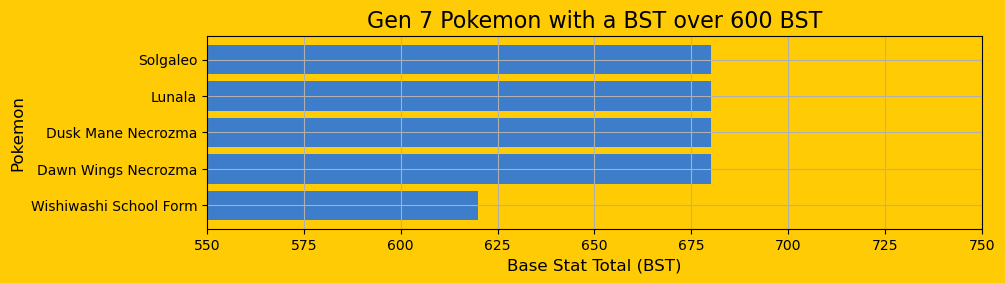

In [37]:
plt.figure(figsize = (10,2.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen7.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen7.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen7.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen7.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
ax.set(xlim = (550, 750))
plt.grid()
plt.title("Gen 7 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 7 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 8

In [38]:
stats_gen8 = generation_provider(8)

In [39]:
stats_gen8.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
971,810,Grookey,Grookey,default,310,50,65,50,40,40,65,grass,NaN,#3D7DCA,NaN
972,811,Thwackey,Thwackey,default,420,70,85,70,55,60,80,grass,NaN,#3D7DCA,NaN
973,812,Rillaboom,Rillaboom,default,530,100,125,90,60,70,85,grass,NaN,#3D7DCA,NaN
974,813,Scorbunny,Scorbunny,default,310,50,71,40,40,40,69,fire,NaN,#3D7DCA,NaN
975,814,Raboot,Raboot,default,420,65,86,60,55,60,94,fire,NaN,#3D7DCA,NaN


In [40]:
gen8_count = np.max(stats_gen8["index"]) + 1 - np.min(stats_gen8["index"])
gen8_mean = np.mean(stats_gen8.total) 
gen8_median = np.median(stats_gen8.total) 
gen8_min = np.min(stats_gen8.total) 
gen8_max = np.max(stats_gen8.total) 
print("GEN 8: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen8_count, gen8_mean, gen8_median,
                                                                           gen8_min, gen8_max))

at_least_600_gen8 = stats_gen8[stats_gen8["total"] >= 600]
over_600_gen8 = stats_gen8[stats_gen8["total"] > 600]
at_least_600_gen8_count = len(at_least_600_gen8)
over_600_gen8_count = len(over_600_gen8)

print("GEN 8: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen8_count), str(over_600_gen8_count)))


GEN 8: 96 Pokemon    Mean: 452.97196261682245, Median: 485.0, Min: 180, Max: 700
GEN 8: At least 600 BST: 9, Over 600 BST: 7


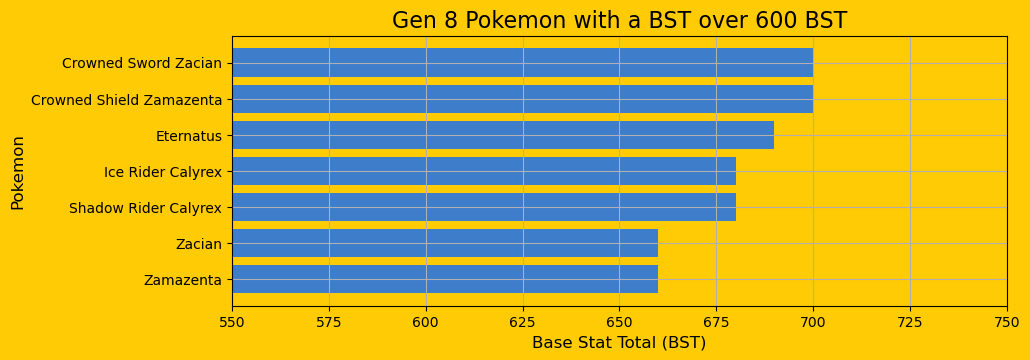

In [41]:
plt.figure(figsize = (10,3.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen8.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen8.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen8.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen8.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Gen 8 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 8 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

## Generation 9

In [42]:
stats_gen9 = generation_provider(9)

In [43]:
stats_gen9.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
1079,906,Sprigatito,Sprigatito,default,310,40,61,54,45,45,65,grass,NaN,#3D7DCA,NaN
1080,907,Floragato,Floragato,default,410,61,80,63,60,63,83,grass,NaN,#3D7DCA,NaN
1081,908,Meowscarada,Meowscarada,default,530,76,110,70,81,70,123,grass,dark,#3D7DCA,NaN
1082,909,Fuecoco,Fuecoco,default,310,67,45,59,63,40,36,fire,NaN,#3D7DCA,NaN
1083,910,Crocalor,Crocalor,default,411,81,55,78,90,58,49,fire,NaN,#3D7DCA,NaN


In [44]:
gen9_count = np.max(stats_gen9["index"]) + 1 - np.min(stats_gen9["index"])
gen9_mean = np.mean(stats_gen9.total) 
gen9_median = np.median(stats_gen9.total) 
gen9_min = np.min(stats_gen9.total) 
gen9_max = np.max(stats_gen9.total) 
print("GEN 9: {} Pokemon    Mean: {}, Median: {}, Min: {}, Max: {}".format(gen9_count, gen9_mean, gen9_median,
                                                                           gen9_min, gen9_max))

at_least_600_gen9 = stats_gen9[stats_gen9["total"] >= 600]
over_600_gen9 = stats_gen9[stats_gen9["total"] > 600]
at_least_600_gen9_count = len(at_least_600_gen9)
over_600_gen9_count = len(over_600_gen9)

print("GEN 9: At least 600 BST: {}, Over 600 BST: {}".format(str(at_least_600_gen9_count), str(over_600_gen9_count)))


GEN 9: 120 Pokemon    Mean: 462.7185185185185, Median: 489.0, Min: 210, Max: 700
GEN 9: At least 600 BST: 8, Over 600 BST: 4


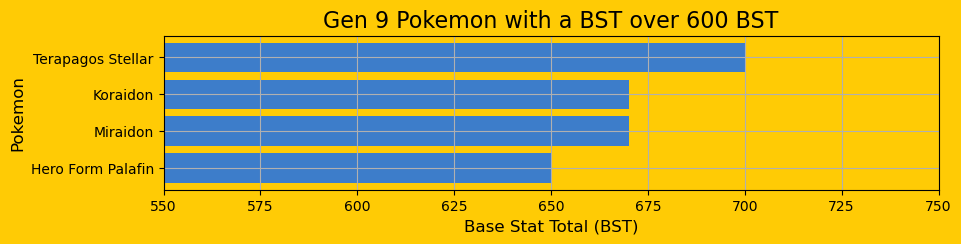

In [45]:
plt.figure(figsize = (10,2), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gen9.sort_values(by = "total", ascending = False).name[0:10],
         width = over_600_gen9.sort_values(by = "total", ascending = False).total[0:10],
         color = over_600_gen9.sort_values(by = "total", ascending = False).colour[0:10],
         label = over_600_gen9.sort_values(by = "total", ascending = False).information[0:10])
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Gen 9 Pokemon with a BST over 600 BST", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Gen 9 Pokemon over 600 BST.png", bbox_inches='tight')
plt.show()

# All Generations

We need lists for each summary statistic we have calculated, so we use list comprehensions for this

In [46]:
generation_name_list = ["Gen " + str(i) for i in range(1,10)]
mean_list = [eval("gen" + str(i) + "_mean") for i in range(1,10)]
median_list =  [eval("gen" + str(i) + "_median") for i in range(1,10)]
max_list = [eval("gen" + str(i) + "_max") for i in range(1,10)]
min_list = [eval("gen" + str(i) + "_min") for i in range(1,10)]
count_list = [eval("gen" + str(i) + "_count") for i in range(1,10)]

Now let's plot the mean and the median

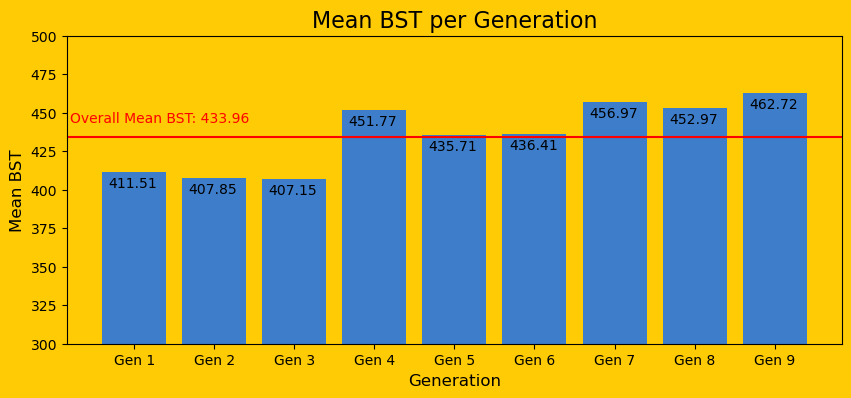

In [47]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.bar(x = generation_name_list, height = mean_list, color = "#3D7DCA")
plt.axhline(y = overall_mean, color = "red")
plt.annotate("Overall Mean BST: {}".format(round(overall_mean,2)), [-0.8,overall_mean + 10], color = "red")
for i in range(len(mean_list)):
    plt.annotate(round(mean_list[i], 2), [i - 0.32, mean_list[i] - 10])
ax.set(ylim = (300, 500))
plt.yticks(fontsize = 10)
plt.title("Mean BST per Generation", fontsize = 16)
plt.xlabel("Generation", fontsize = 12)
plt.ylabel("Mean BST", fontsize = 12)
ax.set_facecolor("#FFCB05")
plt.savefig("0. Mean BST per Generation Bar Chart.png", bbox_inches='tight')
plt.show()

We can see that generations 1, 2 and 3 are all below the average while every other generation is above, with generations 5 and 6 being only a couple of Stat Points above the mean.

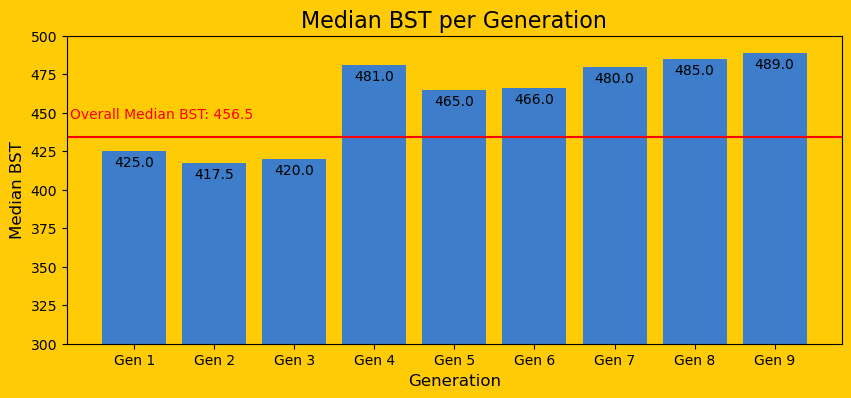

In [48]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.bar(x = generation_name_list, height = median_list, color = "#3D7DCA")
plt.axhline(y = overall_mean, color = "red")
plt.annotate("Overall Median BST: {}".format(round(overall_median,2)), [-0.8,overall_median - 10], color = "red")
for i in range(len(median_list)):
    plt.annotate(round(median_list[i],2), [i - 0.25, median_list[i] - 10])
ax.set(ylim = (300, 500))
plt.yticks(fontsize = 10)
plt.title("Median BST per Generation", fontsize = 16)
plt.xlabel("Generation", fontsize = 12)
plt.ylabel("Median BST", fontsize = 12)
ax.set_facecolor("#FFCB05")
plt.savefig("0. Median BST per Generation Bar Chart.png", bbox_inches='tight')
plt.show()

Similarly to the mean plot, generations 1, 2 and 3 are below while everything else is above. The next lowest are about 10 over the overall median!

## Creating 3 groups of generations

To get a better understanding of the change over time, we can group generations together i.e. Generations 1,2 and 3 can be grouped together as they were all release before the end of 2005. Generations 4,5 and 6 were all released before 2015 and Generations 7,8,9 were all released before 2025. After we have analysed these groups, we can look into each individually. We will use the stats_temp dataset instead of stats so we don't have to remove the pokemon again

In [49]:
def gen_grouper(df):
    gen_group_start = [1,387,722]
    gen_group_end = [386, 721, 1025]
    gen_min_dex = []
    gen_max_dex = []
    for i in range(len(gen_group_start)):
        min_dex = df["index"] >= gen_group_start[i]
        max_dex = df["index"] <= gen_group_end[i]
        gen_min_dex.append(min_dex)
        gen_max_dex.append(max_dex)
    gens123 = df[gen_min_dex[0] & gen_max_dex[0]]
    gens456 = df[gen_min_dex[1] & gen_max_dex[1]] 
    gens789 = df[gen_min_dex[2] & gen_max_dex[2]] 
    
    return gens123, gens456, gens789

Next we call the function and initialise 2 lists that we will store the counts into

In [50]:
gens123, gens456, gens789 = gen_grouper(stats_temp)
grouped_gen_list = ["Gens 123", "Gens 456", "Gens 789"]
grouped_gen_at_least_600_count_list = []
grouped_gen_over_600_count_list = []

We then calculate our counts to store into the lists. This is repeated 3 times for the 3 grouped generations

In [51]:
at_least_600_gens123 = gens123[gens123["total"] >= 600]
at_least_600_gens123_count = len(at_least_600_gens123)
grouped_gen_at_least_600_count_list.append(at_least_600_gens123_count)

over_600_gens123 = gens123[gens123["total"] > 600]
over_600_gens123_count = len(over_600_gens123)
grouped_gen_over_600_count_list.append(over_600_gens123_count)
print("Generations 1,2 and 3 have {} pokemon with a BST of least 600 and {} pokemon with a BST over 600 ".format(at_least_600_gens123_count,over_600_gens123_count))

Generations 1,2 and 3 have 20 pokemon with a BST of least 600 and 7 pokemon with a BST over 600 


In [52]:
at_least_600_gens456 = gens456[gens456["total"] >= 600]
at_least_600_gens456_count = len(at_least_600_gens456)
grouped_gen_at_least_600_count_list.append(at_least_600_gens456_count)

over_600_gens456 = gens456[gens456["total"] > 600]
over_600_gens456_count = len(over_600_gens456)
grouped_gen_over_600_count_list.append(over_600_gens456_count)
print("Generations 4,5 and 6 have {} pokemon with a BST of least 600 and {} pokemon with a BST over 600 ".format(at_least_600_gens456_count,over_600_gens456_count))

Generations 4,5 and 6 have 35 pokemon with a BST of least 600 and 16 pokemon with a BST over 600 


In [53]:
at_least_600_gens789 = gens789[gens789["total"] >= 600]
at_least_600_gens789_count = len(at_least_600_gens789)
grouped_gen_at_least_600_count_list.append(at_least_600_gens789_count)

over_600_gens789 = gens789[gens789["total"] > 600]
over_600_gens789_count = len(over_600_gens789)
grouped_gen_over_600_count_list.append(over_600_gens789_count)
print("Generations 7,8 and 9 have {} pokemon with a BST of least 600 and {} pokemon with a BST over 600 ".format(at_least_600_gens789_count,over_600_gens789_count))

Generations 7,8 and 9 have 28 pokemon with a BST of least 600 and 16 pokemon with a BST over 600 


In [54]:
grouped_gen_over_600_count_list

[7, 16, 16]

Next we can compare the count for pokemon over 600 BST, then we can plot which pokemon for each group

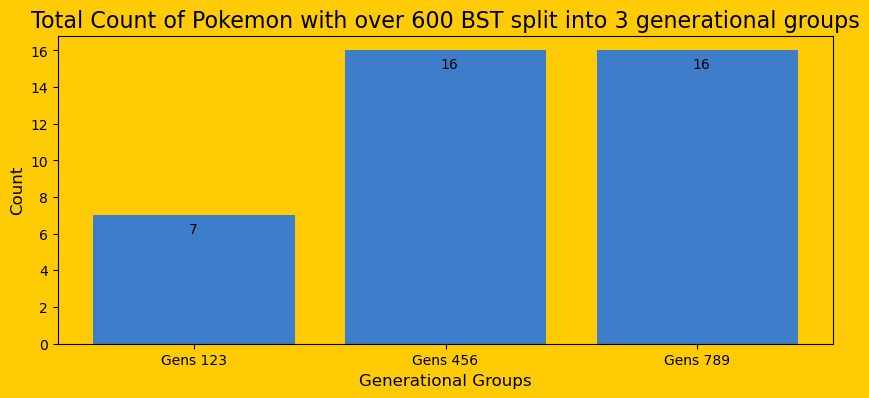

In [55]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.bar(x = grouped_gen_list, height = grouped_gen_over_600_count_list, color = "#3D7DCA")

for i in range(len(grouped_gen_over_600_count_list)):
    plt.annotate(grouped_gen_over_600_count_list[i], [i - 0.02, grouped_gen_over_600_count_list[i] - 1])
plt.yticks(fontsize = 10)
plt.title("Total Count of Pokemon with over 600 BST split into 3 generational groups", fontsize = 16)
plt.xlabel("Generational Groups", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax.set_facecolor("#FFCB05")
plt.savefig("0. Pokemon with over 600 BST grouped Generations.png", bbox_inches='tight')
plt.show()

We can see a large increase between the first group and the last two. This could be evidence of the evolution of the Pokemon Company's stat design of pokemon throughout the different generations. It may be helpful to see the stats of the pokemon that make up this graph.

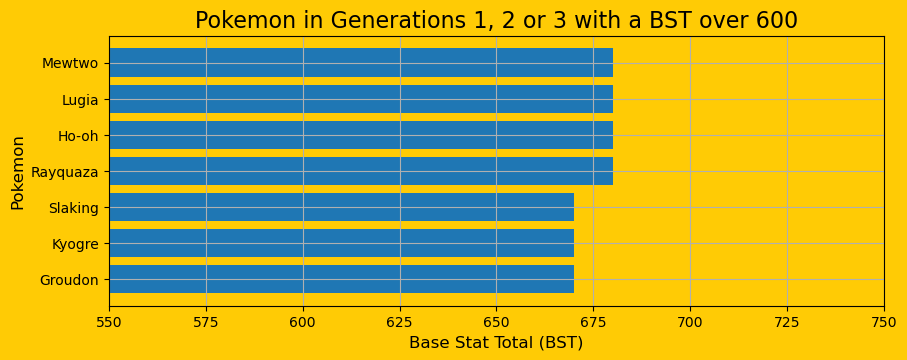

In [56]:
plt.figure(figsize = (10,3.5), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gens123.sort_values(by = "total", ascending = False).name,
         width = over_600_gens123.sort_values(by = "total", ascending = False).total)
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Pokemon in Generations 1, 2 or 3 with a BST over 600", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Generation 1,2,3 Pokemon with over 600 BST grouped.png", bbox_inches='tight')
plt.show()

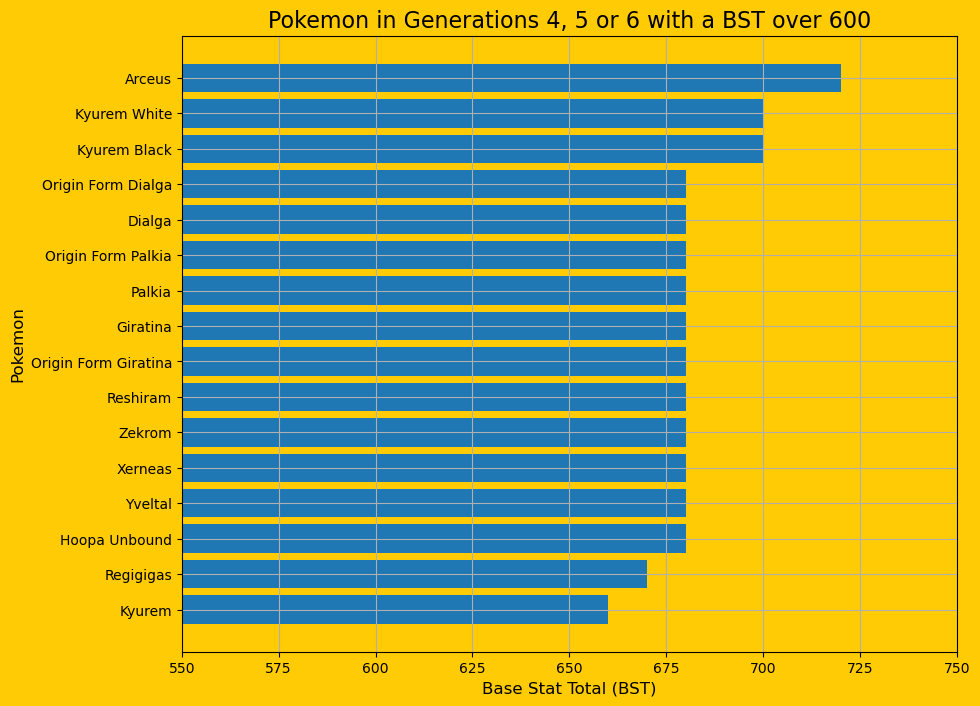

In [57]:
plt.figure(figsize = (10,8), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gens456.sort_values(by = "total", ascending = False).name,
         width = over_600_gens456.sort_values(by = "total", ascending = False).total)
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Pokemon in Generations 4, 5 or 6 with a BST over 600", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Generation 4,5,6 Pokemon with over 600 BST grouped.png", bbox_inches='tight')
plt.show()

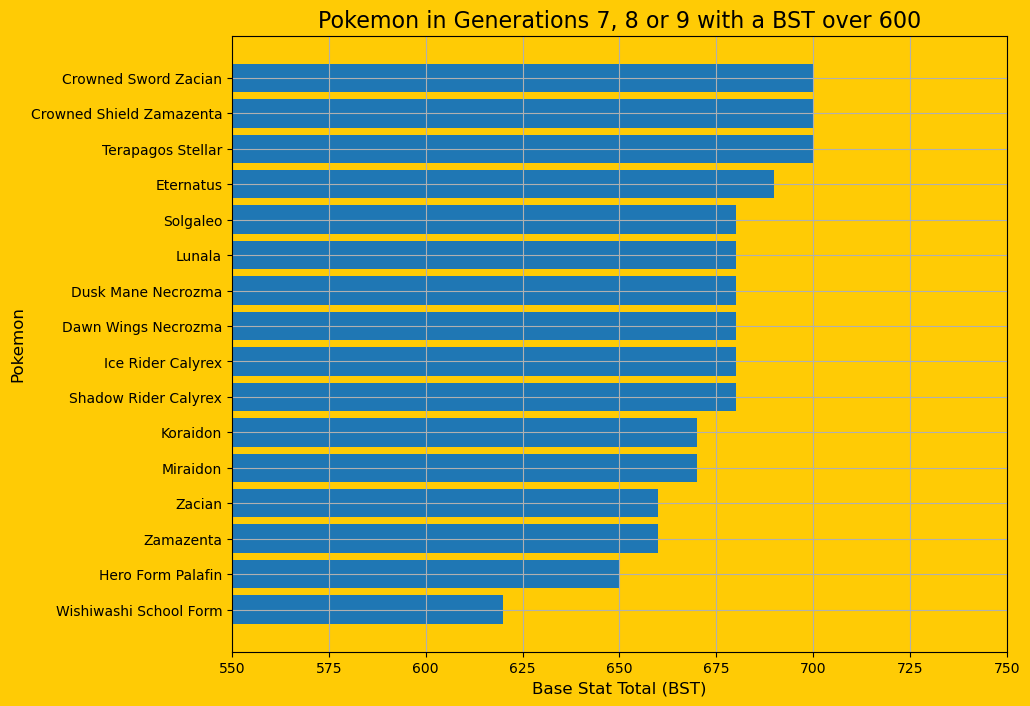

In [58]:
plt.figure(figsize = (10,8), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600_gens789.sort_values(by = "total", ascending = False).name,
         width = over_600_gens789.sort_values(by = "total", ascending = False).total)
plt.yticks(fontsize = 10)
plt.grid()
ax.set(xlim = (550, 750))
plt.title("Pokemon in Generations 7, 8 or 9 with a BST over 600", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Generation 7,8,9 Pokemon with over 600 BST grouped.png", bbox_inches='tight')
plt.show()

We will look to analyse these in a later section when looking at all pokemon over 600 BST in a single plot

## Plotting the Counts per generation

We already have some variables named "at_least_600_gen#" and "over_600_gen#", so let's make them into lists as well.

In [59]:
at_least_600 = [[generation_name_list[i],eval("at_least_600_gen" + str(i + 1) + "_count")] for i in range(9)]
at_least_600_df = pd.DataFrame(columns = ["Generation", "Count_at_least_600"], data = at_least_600)
at_least_600_df_sorted = at_least_600_df.sort_values(by = "Count_at_least_600", ascending = False).reset_index()


over_600 = [[generation_name_list[i], int(eval("over_600_gen" + str(i + 1) + "_count"))] for i in range(9)]
over_600_df = pd.DataFrame(columns = ["Generation", "Count_over_600"], data = over_600)
over_600_df_sorted = over_600_df.sort_values(by = "Count_over_600", ascending = False).reset_index()

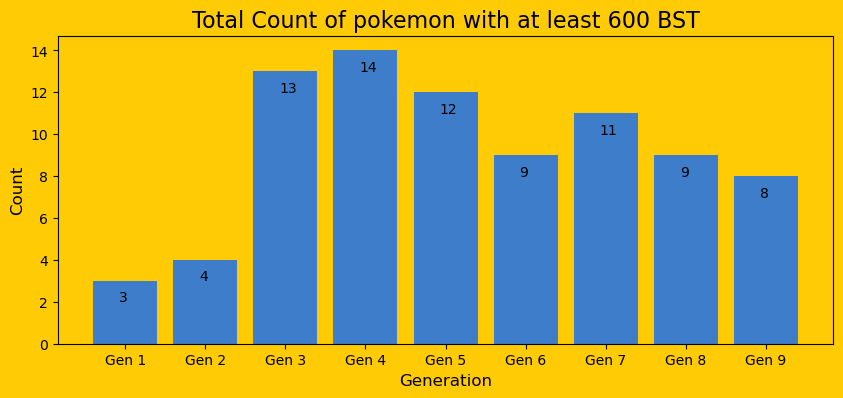

In [60]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.bar(x = at_least_600_df.Generation, height = at_least_600_df.Count_at_least_600, color = "#3D7DCA")

for i in range(len(at_least_600_df.Count_at_least_600)):
    plt.annotate(at_least_600_df.Count_at_least_600[i], [i - 0.075 , at_least_600_df.Count_at_least_600[i] - 1])
    
plt.yticks(fontsize = 10)
plt.title("Total Count of pokemon with at least 600 BST", fontsize = 16)
plt.xlabel("Generation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax.set_facecolor("#FFCB05")
plt.savefig("0. Pokemon with at least 600 BST per Generation.png", bbox_inches='tight')
plt.show()

We can see a mode at Gen 4 then a slow decrease after. The more important area of the graph is the first two generations which are very low compared to the rest, possibly a result of improvement and evolution of in game stats.

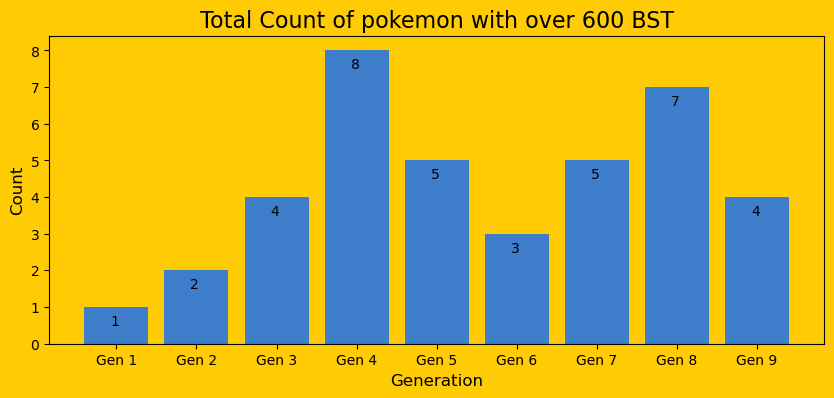

In [61]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.bar(x = over_600_df.Generation, height = over_600_df.Count_over_600, color = "#3D7DCA")

for i in range(len(over_600_df.Count_over_600)):
    plt.annotate(over_600_df.Count_over_600[i], [i - 0.075 , over_600_df.Count_over_600[i] - 0.5])
    
plt.yticks(fontsize = 10)
plt.title("Total Count of pokemon with over 600 BST", fontsize = 16)
plt.xlabel("Generation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax.set_facecolor("#FFCB05")
plt.savefig("0. Pokemon with over 600 BST per Generation.png", bbox_inches='tight')
plt.show()

We see another similar situation here except this plot is bi-modal with one at gen 4 and one at gen8. Generations 1 and 2 are very low again, then after them we get 2 almost symmetrical bell curves. This may be a pattern for the game designers, although we can only tell after generation 10 has been fully released.

## Mega Evolutions and Primal Reversions

At the beginning we removed any pokemon with "Mega/Primal" and "Inaccessible Ingame" in the information column. Let's reintroduce the mega evolutions by looking at them alone. All of these pokemon have boosted stats over their default counterparts so they should add another level to the analysis

In [62]:
mega_primal_stats = stats[stats["information"] == "Mega/Primal"]
mega_primal_stats.head()

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
2,3,Mega Venusaur,Venusaur,Mega,625,80,100,123,122,120,80,grass,poison,green,Mega/Primal
6,6,Mega Charizard X,Charizard,Mega,634,78,130,111,130,85,100,fire,dragon,green,Mega/Primal
7,6,Mega Charizard Y,Charizard,Mega,634,78,104,78,159,115,100,fire,flying,green,Mega/Primal
11,9,Mega Blastoise,Blastoise,Mega,630,79,103,120,135,115,78,water,NaN,green,Mega/Primal
18,15,Mega Beedrill,Beedrill,Mega,495,65,150,40,15,80,145,bug,poison,green,Mega/Primal


In [63]:
len(mega_primal_stats)

50

In [64]:
print(mega_primal_stats.total.min(), mega_primal_stats.total.max())

480 780


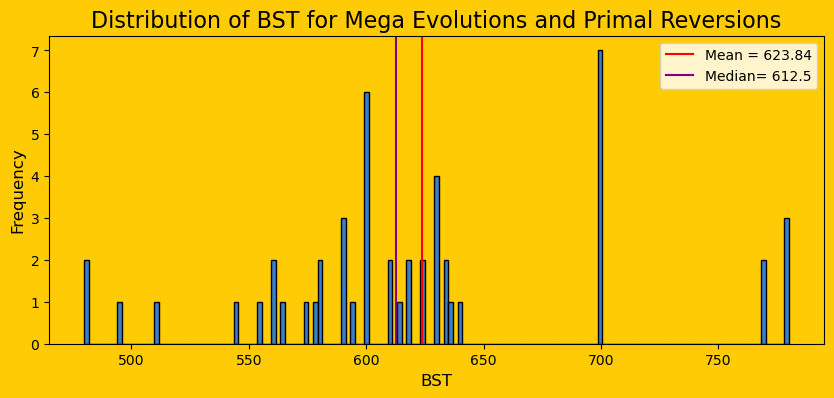

In [65]:
plt.figure(figsize = (10,4), facecolor = "#FFCB05")
ax = plt.subplot()
plt.hist(x = mega_primal_stats.total, bins = 151, edgecolor='black', color = "#3D7DCA")
plt.axvline(x = mega_primal_stats["total"].mean(), color = "red", label = "Mean = {}".format(mega_primal_stats["total"].mean()))
plt.axvline(x = mega_primal_stats["total"].median(), color = "purple", label = "Median= {}".format(mega_primal_stats["total"].median()))
plt.legend()
ax.set_facecolor("#FFCB05")
plt.title("Distribution of BST for Mega Evolutions and Primal Reversions", fontsize = 16)
plt.xlabel("BST", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.savefig("0. Distribution of BST histogram Mega and Primal Pokemon.png", bbox_inches='tight')
plt.show()

We have 50 pokemon in this histogram as given by the size of the dataframe. 7 pokemon share the 700 BST, 5 are above and the rest are below. The maximum is at 780 which has 3 pokemon and the minimum is at 480 which has 2 pokemon.

In [66]:
mega_primal_stats.sort_values(by = "total", ascending = True).head(2)

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
374,303,Mega Mawile,Mawile,Mega,480,50,105,125,55,95,50,steel,fairy,green,Mega/Primal
372,302,Mega Sableye,Sableye,Mega,480,50,85,125,85,115,20,dark,ghost,green,Mega/Primal


In [67]:
mega_primal_stats.sort_values(by = "total", ascending = False).head(3)

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
201,150,Mega Mewtwo Y,Mewtwo,Mega,780,106,150,70,194,120,140,psychic,NaN,green,Mega/Primal
200,150,Mega Mewtwo X,Mewtwo,Mega,780,106,190,100,154,100,130,psychic,fighting,green,Mega/Primal
474,384,Mega Rayquaza,Rayquaza,Mega,780,105,180,100,180,100,115,dragon,flying,green,Mega/Primal


Mawile and Sableye are the two pokemon sharing the bottom spot while Mewtwo and Rayquaza share the first. 

Last thing to consider is how many of them have a BST over 600 for each generation

In [68]:
gens123, gens456, gens789 = gen_grouper(mega_primal_stats)

over_600_gens123 = gens123[gens123["total"] > 600]
over_600_gens123_count = len(over_600_gens123)

over_600_gens456 = gens456[gens456["total"] > 600]
over_600_gens456_count = len(over_600_gens456)

over_600_gens789 = gens789[gens789["total"] > 600]
over_600_gens789_count = len(over_600_gens789)


In [69]:
print("Gens 1,2,3 have {} pokemon with a BST over 600 \nGens 4,5,6 have {} pokemon with a BST over 600 \nGens 7,8,9 have {} pokemon with a BST over 600".format(over_600_gens123_count, over_600_gens456_count, over_600_gens789_count))

Gens 1,2,3 have 23 pokemon with a BST over 600 
Gens 4,5,6 have 4 pokemon with a BST over 600 
Gens 7,8,9 have 0 pokemon with a BST over 600


So the mega evolutions and primal reversions are primarily in generations 1, 2 and 3 and there are none in generations 7, 8 and 9. This is all we cover for Megas and Primals as they are known as a "gimmick" and they haven't been seen in a pokemon game since generation 7.

## Plotting all pokemon with a BST over 600

The last thing to look at is how each pokemon stacks up against others. We will do this by plotting all non-mega, non-primal pokemon with a BST over 600. We can do this by using the stats_temp dataset again

In [70]:
over_600 = stats_temp[stats_temp["total"] > 600]
len(over_600)

39

We have 39 pokemon out of 1025 that have a Base Stat Total over 600, so we can just plot them below

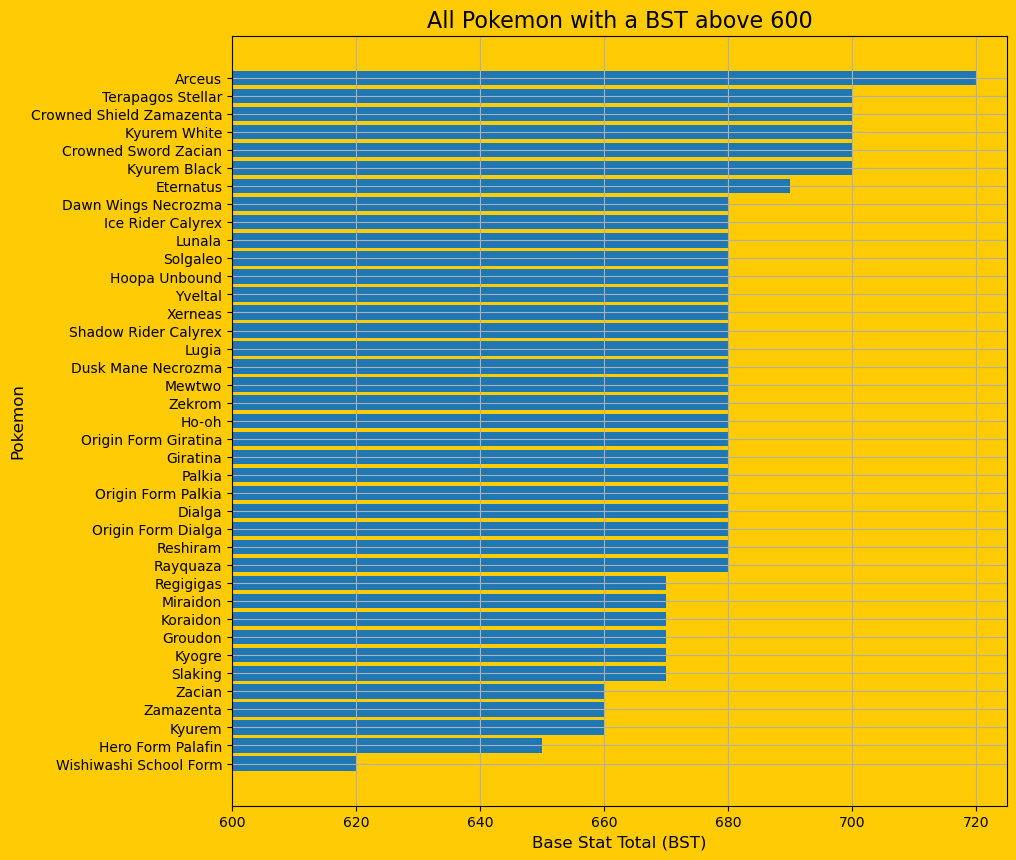

In [71]:
plt.figure(figsize = (10,10), facecolor = "#FFCB05")
ax = plt.subplot()
plt.barh(y = over_600.sort_values(by = "total", ascending = False).name,
         width = over_600.sort_values(by = "total", ascending = False).total)
plt.yticks(fontsize = 10)
ax.set(xlim = (600, 725))
plt.grid()
plt.title("All Pokemon with a BST above 600", fontsize = 16)
plt.xlabel("Base Stat Total (BST)", fontsize = 12)
plt.ylabel("Pokemon", fontsize = 12)
ax.invert_yaxis()
ax.set_facecolor("#FFCB05")
plt.savefig("0. Pokemon with over 600 BST.png", bbox_inches='tight')
plt.show()

The majority of the pokemon in this list are legendaries or mythicals, but we have 3 that aren't

1. Slaking - Slaking is a generation 3 pokemon with ridiculous stats, rivalling those of the box art legendaries from Hoenn. With a 160 base attack stat, it will run through any team. However, these stats come at a cost. Since Slaking isn't a legendary pokemon, they gave it the ability "Truant". This makes it so Slaking can't attack every other turn, making it so the opposition has a turn to do something without massive damage coming from Slaking

In [72]:
stats_temp.loc[stats_temp["name"] == "Slaking"]

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
359,289,Slaking,Slaking,default,670,150,160,100,95,65,100,normal,NaN,#3D7DCA,NaN


2. Hero Form Palafin - New to Generation 9, Palafin is a small dolphin pokemon with mediocre base stats of 457. However, what makes this pokemon so strong is the ability. If Palafin switches out, it will active the ability "Zero to Hero", where Palafin will return to the battle in Hero Form. With the same attack stat as Slaking it packs a punch(no pun intended) using its signature priority water move, "Jet Punch". The obvious draw back for such a strong pokemon is having to switch it out to transform, but you can find work arounds to it

In [73]:
stats_temp.loc[stats_temp["species"] == "Palafin"]

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
1142,964,Palafin,Palafin,default,457,100,70,72,53,62,100,water,NaN,#3D7DCA,NaN
1143,964,Hero Form Palafin,Palafin,Hero Form,650,100,160,97,106,87,100,water,NaN,#3D7DCA,NaN


3. Wishiwashi School Form - Native to Alola, Wishiwashi is a generation 7 pokemon with terrible stats. It has 175 total, the least out of all generation 7 pokemon. However, Wishiwashi has an ability "Schooling" where, when above 25% HP, Wishiwashi transforms to it's school form. As seen below, the change is immense. Boasting a 140 base attack and special attack stat, Wishiwashi becomes a menace. Anyone that has played through Sun and Moon will know this from the Trial at Brooklet Hill

In [74]:
stats_temp.loc[stats_temp["species"] == "Wishiwashi"]

,index,name,species,form,total,hp,attack,defense,sp_atk,sp_def,speed,type1,type2,colour,information
902,746,Wishiwashi,Wishiwashi,default,175,45,20,20,25,25,40,water,NaN,#3D7DCA,NaN
903,746,Wishiwashi School Form,Wishiwashi,School Form,620,45,140,130,140,135,30,water,NaN,#3D7DCA,NaN


# Conclusion

To answer the original question briefly, they have changed a lot. After completing computations for all generations individually, we found that the mean and median base stat totals have increased over the years, although some decreased a little compared to all around them. With this, we found that generations 1,2 and 3 have the lowest means by about 20 points and medians by approximately 40 points, which means there is a large gap between general strength between the generations. 

Next we grouped the generations together by splitting them in 3s. The generations 1,2 and 3 were all released before 2005, generations 4,5 and 6 were all released before 2015 and generations 7,8 and 9 were all released before 2025. We saw that generations 1,2 and 3 have the least quantity of pokemon with a BST over 600 with 7 while having the maximum at 680. The other two groups had the joint most pokemon with a BST over 600 with 16. Generations 4,5 and 6 had the highest maximum at 720 while generations 7,8 and 9 had a maximum of 700. This shows the game designers have created a larger quantity of stronger pokemon compared to the first three generations, most likely due to the adapting to the overall game design each generation. This creates a small power curve, so the next generation will need at least a few pokemon strong enough to "hang" with the others at that level

We then split them into separate generations and completed the same analysis as the above. This time, we found that generations 1 and 2 are far away from the rest, with generation 3 being the start of the large power curve. When looking at pokemon >= 600 BST, we have a large increase from generation 2 to 3, then a mode at generation 4, and a slow and steady decrease towards generation 9. The graph showing the count of pokemon with a BST over 600 has a less consistent pattern, with the graph being bi-modal and the generations with the larger counts don't have anything in common. 

The penultimate section covered our mega evolutions and primal reversions. These pokemon are stronger than the original counterparts, although some are a lot stronger than others. The minimum is 480 which is higher than the mean from any generation, and the maximum is 780, 60 points higher than the god pokemon Arceus. The mean and median are both above 600, which makes sense since out of 50 pokemon, 27 of them have a BST over 600.

Finally, we looked at all pokemon that had a base stat total over 600 and plotted them in a bar chart. We had 39 pokemon, 3 of which were not legendary or mythical pokemon. These were analysed a little further as well

If I were to complete this again I may consider analysing pokemon types or other stats, however this would take a long time to finalise.